In [11]:
import skeleton as s
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


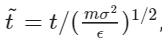

v ->
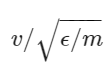

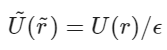

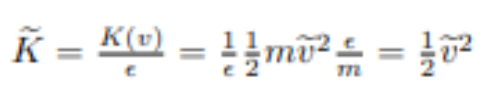

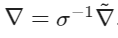

In [12]:
init_pos = np.random.uniform(low=0, high=1.0, size=(2, 2))
init_vel = np.random.uniform(low=-430, high=430, size=(2, 2))
e = 1 #1.65 * pow(10,-21)
s = 1 #3.405 * pow(10,-10)
time_step = 0.01
m = 1 #6.6335 * pow(10, -26) #mass of argon atom in kg
n = 2 #number of particles
number_of_steps = 10

In [3]:
print("initial pos\n", init_pos,"\n initial vel\n" ,init_vel)

initial pos
 [[0.23340954 0.86246909]
 [0.5144281  0.97148885]] 
 initial vel
 [[-105.89045493  -62.38770144]
 [-232.07745123  -98.3561962 ]]


In [4]:
#compute the forces on the particles at each timestep, pos = [m]/[s] = 
def lj_force(position, n):
    F = 0
    pos = position[:,-n:]
    for j in range(n):
        f = 0    # force on the j-th particle
        for i in range(n-1):
            if i+j+1 >= n: #take into account particles 0,1,....,j-1
                rel_pos=pos[:,j+i+1-n]-pos[:,j] #gives position of i-th particle with resprect to j-th particle (points from i to j)
                r = np.linalg.norm(pos[:,j+i+1-n]-pos[:,j])
                f += rel_pos*((24/pow(r,2))*(pow(1/r,6))*((pow(1/r,6))-1))  # ff on the j-th part. from the interaction with the i-th part.
            else: #take into account particles j+1,....,n-1
                rel_pos=pos[:,j+i+1]-pos[:,j] #gives position of i-th particle with resprect to j-th particle (points from i to j)
                r = np.linalg.norm(pos[:,j+i+1]-pos[:,j])
                f += rel_pos*((24/pow(r,2))*(pow(1/r,6))*((pow(1/r,6))-1))  # f on the j-th part. from the interaction with the i-th part.
        if j == 0:
            F = f
        else:
            F = np.concatenate((F, f), axis=0, out=None)
    
    F_matrix = np.zeros((2,n)) #2 is the number of dimensions, n is the number of particles
    F_matrix[:n] = F[0:n]
    F_matrix[1:] = F[2:]
    return F_matrix

In [5]:
final_matrix_pos = np.copy(init_pos)
final_matrix_vel = np.copy(init_vel)

def euler(final_matrix_pos, final_matrix_vel):
    
    latest_pos = np.copy(final_matrix_pos[:,-2:])          #the -2 will eventually become -(number of particles)
    latest_vel = np.copy(final_matrix_vel[:,-2:])
    
    new_latest_pos = latest_pos + latest_vel * time_step
    new_latest_vel = latest_vel + lj_force(latest_pos, 2)
    return new_latest_pos, new_latest_vel


In [6]:
def kin_en(v,n): #v is the last step velocity and n the number of particles
    K = 0
    for i in range(n):
        K += 0.5*((v[0,i]*v[0,i])+(v[1,i]*v[1,i]))
    return K

In [7]:
def pot_en(position, n): #position is the matrix with all the positions stored in it, n is the number of particles
    U = 0;
    pos = position[:,-n:]
    for j in range(n):
        for i in range(n-1):
            if i+j+1 >= n: #take into account particles 0,1,....,j-1
                r = np.linalg.norm(pos[:,j+i+1-n]-pos[:,j])
                U += (4)*(pow(1/r,6))*((pow(1/r,6))-1)  # potnetial energy of the j-th part. from the interaction with the i-th part.
            else: #take into account particles j+1,....,n-1
                r = np.linalg.norm(pos[:,j+i+1]-pos[:,j])
                U += (4)*(pow(1/r,6))*((pow(1/r,6))-1)  # potential energy of the j-th part. from the interaction with the i-th part.
                
    return U

In [13]:
#Create a 2x8 matrix to store the velocity of each particle at each step in time.
next_step_velocity = np.copy(init_vel)

#Create a 2x8 matrix to store the position of each particle at each step in time.
next_step_position = np.copy(init_pos)

final_vector_energy = np.array([kin_en(init_vel, n) + pot_en(final_matrix_pos, n)])

for i in range(number_of_steps):
    next_step_position, next_step_velocity = euler(final_matrix_pos, final_matrix_vel)
    for k in range(2): #implement boundary conditions
        for j in range(2):
            next_step_position[k, j] = next_step_position[k, j]%1
    final_matrix_pos =  np.concatenate((final_matrix_pos, next_step_position), axis=1, out=None)
    final_matrix_vel =  np.concatenate((final_matrix_vel, next_step_velocity), axis=1, out=None)
    final_vector_energy = np.concatenate((final_vector_energy, np.array([kin_en(next_step_velocity, n) + pot_en(final_matrix_pos, n)])), axis=0, out=None)

print("Positions:\n" , final_matrix_pos)
print("Velocities:\n" , final_matrix_vel)
print("Energy:\n" , final_vector_energy)

Positions:
 [[0.23340954 0.86246909 0.56204475 0.69936476 0.33515745 0.39320135
  0.17429312 0.81541468 0.32332514 0.07392936 0.13670197 0.3186148
  0.9282465  0.93144441 0.65720463 0.02805686 0.51171875 0.578125
  0.46191406 0.90625    0.00488281 0.65625    0.30210876 0.88134766
  0.41848755 0.84472656 0.21098328 0.77685547 0.85462952 0.03320312
  0.75576782 0.30615234 0.35751343 0.38427734 0.12234497 0.28759766
  0.         0.         0.5        0.         0.         0.
  0.40625    0.375      0.8125     0.375      0.84375    0.25
  0.53125    0.         0.28125    0.125      0.09375    0.5625
  0.75       0.         0.96875    0.1875     0.09375    0.4375
  0.1875     0.6875    ]
 [0.5144281  0.97148885 0.28207441 0.90290024 0.60524322 0.97737071
  0.86238907 0.32346445 0.80963857 0.83325683 0.09254326 0.35687846
  0.39728069 0.51235586 0.76460361 0.18405032 0.00634766 0.390625
  0.15283203 0.8125     0.70605469 0.8125     0.61204529 0.51220703
  0.69888306 0.47363281 0.10958862 0.4